Minimal forward- and backward- pass example for FC-network

In [1]:
import numpy as np

In [34]:
class Layer(object):
    """
    Layers base class
    """
    def __init__(self):
        self.weights = {}
        self.grads = {}
    
    def forward(self, X, y=None):
        raise NotImplementedError
    
    def backward(self, grad):
        raise NotImplementedError

In [35]:
class Linear(Layer):
    """
    Linear layer: X -> X @ W + b
    """
    
    def __init__(self, n_inputs, n_outputs):
        super(Linear, self).__init__()
        self.weights['W'] = np.random.normal(size=(n_inputs, n_outputs))
        self.weights['b'] = np.zeros(shape=(1, n_outputs))
    
    def forward(self, X, y=None):
        self.X = X
        return np.dot(X, self.weights['W']) + self.weights['b']
    
    def backward(self, grad):
        self.grads['W'] = np.dot(self.X.T, grad)
        self.grads['b'] = np.sum(grad, axis=0)
        return np.dot(grad, self.weights['W'].T)

In [36]:
class ReLU(Layer):
    """
    ReLU activation layer: X -> max(0, X)
    """
    
    def forward(self, X):
        self.X = X
        return np.maximum(0, X)
    
    def backward(self, grad):
        mask = self.X < 0
        grad[mask] = 0
        return grad

In [50]:
class Sigmoid(Layer):
    """
    Sigmoid activation layer: X -> 1 / (1 + exp(-X))
    """
    
    def forward(self, X):
        self.X = X
        self.S = 1. / (1. + np.exp(-X))
        return self.S
    
    def backward(self, grad):
        return grad * self.S * (1 - self.S) 

In [79]:
class BCELoss:
    """
    Binary cross-entropy layer: y, p -> - y * log(p) - (1 - y) * log(1 - p)
    """
    
    def forward(self, X, y=None):
        self.X = X
        self.y = y
        return - np.sum(y * np.log(X) + (1 - y) * np.log(1 - X))
    
    def backward(self, grad=1.):
        return - grad * ((self.y / self.X) - (1. - self.y) / (1. - self.X))

In [155]:
nn = [Linear(10, 20), ReLU(), Linear(20, 1), Sigmoid()]
loss = BCELoss()

X = np.random.normal(size=(50, 10))
y = np.random.choice(a=[0,1], size=(50, 1))

losses = []
for ep in range(50):
    x = X.copy()
    
    for layer in nn:
        x = layer.forward(x)

    loss_ = loss.forward(x, y)
    grad = loss.backward()

    for layer in reversed(nn):
        grad = layer.backward(grad)

    nn[0].weights['W'] -= 0.01 * nn[0].grads['W']
    nn[0].weights['b'] -= 0.01 * nn[0].grads['b']
    nn[2].weights['W'] -= 0.01 * nn[2].grads['W']
    nn[2].weights['b'] -= 0.01 * nn[2].grads['b']   
    
    losses.append(loss_)

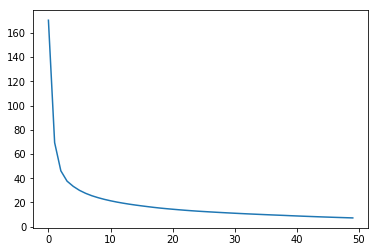

In [156]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(losses)
plt.show()